Tutorial based in [Real Python Post](https://realpython.com/python-keras-text-classification/)

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load files from Label datasets
filepath_dict = {'yelp':   'sentiment-labelled-sentences/yelp_labelled.txt',
                 'amazon': 'sentiment-labelled-sentences/amazon_cells_labelled.txt',
                 'imdb':   'sentiment-labelled-sentences/imdb_labelled.txt'}

# Concatenate the datasets in the same dataframe
df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)

# Select the Yelp dataset 
df_yelp = df[df['source'] == 'yelp']

# Get an Numpy array with the values of the sentense to generate the Training X dataset
sentences = df_yelp['sentence'].values

# Here we get the Y variable with the classification values (1,0)
y = df_yelp['label'].values

# Right now we split our dataset to 75% for training and 25% fo testing
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,
                                                                    y,
                                                                    test_size=0.25,
                                                                    random_state=1000)

In [2]:
'''
 It takes the words of each sentence and creates a vocabulary of all the unique words in the sentences. 
 This vocabulary can then be used to create a feature vector of the count of the words
'''

'''
Here we will use again on the previous BOW model to vectorize the sentences. 
You can use again the CountVectorizer for this task. Since you might not have 
the testing data available during training, you can create the vocabulary 
using only the training data. Using this vocabulary, you can create the 
feature vectors for each sentence of the training and testing set
'''
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [3]:
# Here we can see our complete sentence
sentences_train[1]

'Sorry, I will not be getting food from here anytime soon :('

In [4]:
# Here we have our sentence converted in matrix of token counts
print(X_train[1])

  (0, 63)	1
  (0, 136)	1
  (0, 597)	1
  (0, 616)	1
  (0, 638)	1
  (0, 725)	1
  (0, 1001)	1
  (0, 1372)	1
  (0, 1377)	1
  (0, 1674)	1


In [5]:
# If we use a Pandas dataframe just to see this dataset we have an array with 1713 positions with 
# Binary indications of if there's a occurence of the word or not.
# This 1713 positions it's the size of the dictionary of all dataset. 
# Acording with Scikit-Learning documentation, this is "a sparse representation of the 
# counts using scipy.sparse.csr_matrix.""
pd.DataFrame(X_train[1].toarray())

,0,1,2,3,4,5,6,7,8,9,...,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# In this case let's grab all the positions of or array. 
# I'll transpose only to visualization purposes, and at the end
# I'll grab only the rows with value equals 1

sentence_df = pd.DataFrame(X_train[1].toarray()).T
sentence_df[sentence_df[0] == 1]

# As we can see, we grab only the words in the following positions in the dictionary. 

,0
63,1
136,1
597,1
616,1
638,1
725,1
1001,1
1372,1
1377,1
1674,1


In [7]:
# In the test data we have only the categorical information
print(y_test[1])

0


In [8]:
# And this is our dictionary
vectorizer.vocabulary_

{'the': 1494,
 'food': 597,
 'was': 1634,
 'barely': 125,
 'lukewarm': 888,
 'so': 1360,
 'it': 801,
 'must': 973,
 'have': 710,
 'been': 145,
 'sitting': 1345,
 'waiting': 1622,
 'for': 600,
 'server': 1308,
 'to': 1524,
 'bring': 201,
 'out': 1042,
 'us': 1587,
 'sorry': 1377,
 'will': 1674,
 'not': 1001,
 'be': 136,
 'getting': 638,
 'from': 616,
 'here': 725,
 'anytime': 63,
 'soon': 1372,
 'of': 1010,
 'all': 42,
 'dishes': 434,
 'salmon': 1265,
 'best': 155,
 'but': 223,
 'were': 1657,
 'great': 665,
 'fries': 615,
 'hot': 750,
 'and': 57,
 'neither': 988,
 'my': 974,
 'burger': 215,
 'in': 780,
 'fact': 540,
 'going': 650,
 'round': 1250,
 'up': 1583,
 'stars': 1403,
 'just': 818,
 'because': 143,
 'she': 1323,
 'awesome': 106,
 'go': 647,
 'back': 115,
 'next': 991,
 'trip': 1553,
 'this': 1511,
 'first': 577,
 'crawfish': 350,
 'experience': 531,
 'delicious': 393,
 'could': 336,
 'stomach': 1418,
 'meal': 913,
 'didn': 411,
 'complain': 312,
 'business': 220,
 'lunch': 889,
 

In [9]:
# Now we'll test all datasources using Logistic Regression as a baseline. 
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(sentences,
                                                                        y,
                                                                        test_size=0.25,
                                                                        random_state=1000)

    # Create dictionary of an sparce matrix
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# A Dense nwtwork fully connected using the Sequential API. 
# Each layer has 10 neurons fully connected, and the actionation function 
# to correct the gradients it's the "ReLu". To the final layer
# The activation function it's the sigmoid one. 

from keras.models import Sequential
from keras import layers

# Definition of the features to be inputed in the model
# In this case we have 2505 features. 
input_dim = X_train.shape[1]

# The Sequencial API to add the layers
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# As we're dealing with a classification problem, we'll use 
# a loss function of binary_crossentropy, with the Adam optimizer
# to enhance the convergence and the metric to be monitored to the 
# model will be accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

# In this mode we'll train using 50 epochs and with a small batch size of 10
# It means that for every epoch a sample of 10 records will be used to be 
# propagated through the network during the training phase.
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

# Model Evaluation: Training
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

# Model Evaluation: Test
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 1.0000
Testing Accuracy:  0.7861


In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

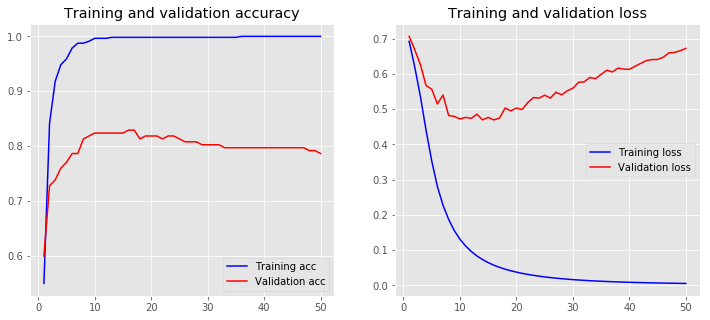

In [12]:
plot_history(history)

In [13]:
'''
Now you need to tokenize the data into a format that can be used by the word embeddings. 
Keras offers a couple of convenience methods for text preprocessing and sequence 
preprocessing which you can employ to prepare your text.

You can start by using the Tokenizer utility class which can vectorize a 
text corpus into a list of integers. Each integer maps to a value in a dictionary 
that encodes the entire corpus, with the keys in the dictionary being the 
vocabulary terms themselves. You can add the parameter num_words, which is 
responsible for setting the size of the vocabulary. The most common 
num_words words will be then kept. I have the testing and training 
data prepared from the previous example:

'''
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])


'''
With CountVectorizer, we had stacked vectors of word counts,
and each vector was the same length (the size of the total 
corpus vocabulary). With Tokenizer, the resulting vectors 
equal the length of each text, and the numbers don’t denote
counts, but rather correspond to the word values from the
dictionary tokenizer.word_index.
'''

I am a fan of his ... This movie sucked really bad.  
[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


In [14]:
for word in ['the', 'all', 'good', 'nice']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 27
good: 33
nice: 257


In [15]:
# Here we can see our dictionaty where the words are the keys of our
# dictionary map, and the order of the words was based in their frequency
tokenizer.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'is': 5,
 'this': 6,
 'i': 7,
 'it': 8,
 'to': 9,
 'in': 10,
 'movie': 11,
 'was': 12,
 'film': 13,
 'that': 14,
 '0': 15,
 'for': 16,
 'as': 17,
 '1': 18,
 'but': 19,
 'with': 20,
 'not': 21,
 'are': 22,
 'on': 23,
 "it's": 24,
 'one': 25,
 'you': 26,
 'all': 27,
 'so': 28,
 'just': 29,
 'bad': 30,
 'at': 31,
 'very': 32,
 'good': 33,
 'an': 34,
 'out': 35,
 'there': 36,
 'be': 37,
 'by': 38,
 'time': 39,
 'like': 40,
 'have': 41,
 'or': 42,
 'about': 43,
 'great': 44,
 'really': 45,
 'from': 46,
 'even': 47,
 'characters': 48,
 'his': 49,
 'who': 50,
 'if': 51,
 'more': 52,
 'see': 53,
 'acting': 54,
 'were': 55,
 '10': 56,
 'has': 57,
 'my': 58,
 'some': 59,
 'well': 60,
 'only': 61,
 'no': 62,
 'he': 63,
 'because': 64,
 'most': 65,
 'when': 66,
 "don't": 67,
 'its': 68,
 'how': 69,
 'story': 70,
 'movies': 71,
 'best': 72,
 'other': 73,
 "didn't": 74,
 'plot': 75,
 'character': 76,
 'can': 77,
 'also': 78,
 'than': 79,
 'real': 80,
 'up': 

In [16]:
'''
One problem that we have is that each text sequence has in most cases different 
length of words. To counter this, you can use pad_sequence() which simply 
pads the sequence of words with zeros. By default, it prepends zeros but 
we want to append them. Typically it does not matter whether you prepend or append zeros.

Additionally you would want to add a maxlen parameter to specify how 
long the sequences should be. This cuts sequences that exceed that number. 
In the following code, you can see how to pad sequences with Keras
'''
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[170 116 390  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 1.0000
Testing Accuracy:  0.6845


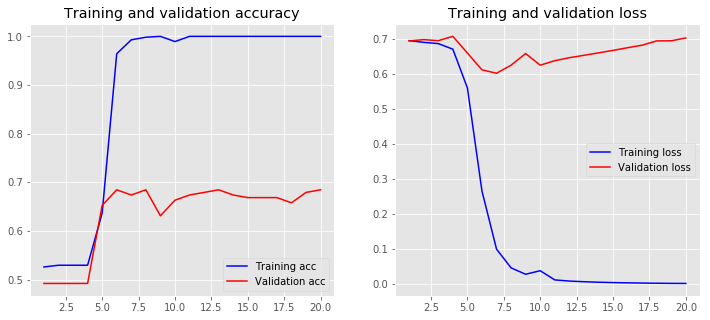

In [17]:
'''
Now you can use the Embedding Layer of Keras which takes the 
previously calculated integers and maps them to a dense vector of the 
embedding. You will need the following parameters:

- input_dim: the size of the vocabulary
- output_dim: the size of the dense vector
- input_length: the length of the sequence

With the Embedding layer we have now a couple of options. One way 
would be to take the output of the embedding layer and plug it into 
a Dense layer. In order to do this you have to add a Flatten layer 
in between that prepares the sequential input for the Dense layer:
'''

from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

'''
You can now see that we have 87350 new parameters to train. 
This number comes from vocab_size times the embedding_dim. 
These weights of the embedding layer are initialized with random 
weights and are then adjusted through backpropagation during training. 

This model takes the words as they come in the order of the 
sentences as input vectors. You can train it with the following:
'''
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 1.0000
Testing Accuracy:  0.7594


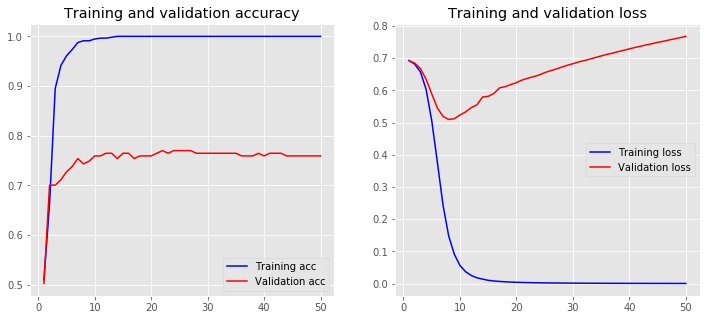

In [18]:
'''
Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D 
or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the 
embedding. You can think of the pooling layers as a way to 
downsample (a way to reduce the size of) the incoming feature vectors.

In the case of max pooling you take the maximum value of all
features in the pool for each feature dimension. In the case
of average pooling you take the average, but max pooling seems 
to be more commonly used as it highlights large values.

Global max/average pooling takes the maximum/average of all 
features whereas in the other case you have to define the 
pool size. Keras has again its own layer that you can add in the sequential model:
'''

from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

In [19]:
'''
The word embeddings do not understand the text as a human would, but they rather map
the statistical structure of the language used in the corpus. Their aim is to map 
semantic meaning into a geometric space. This geometric space is then 
called the embedding space.

'''
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [20]:
# Retrieve the embedding matrix
embedding_dim = 50

embedding_matrix = create_embedding_matrix('/Users/flavioclesio/Desktop/programming-study/machine-learning/nlp/glove.6B/glove.6B.50d.txt',
                                           tokenizer.word_index,
                                           embedding_dim)

In [21]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.9522330097087378

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 521
Non-trainable params: 128,750
_________________________________________________________________
Training Accuracy: 0.7647
Testing Accuracy:  0.7647


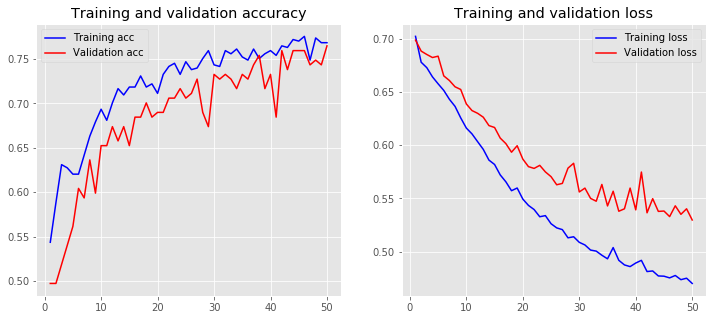

In [22]:
'''
Let’s have a look at the performance when using the 
GlobalMaxPool1D layer:
'''
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 1.0000
Testing Accuracy:  0.8075


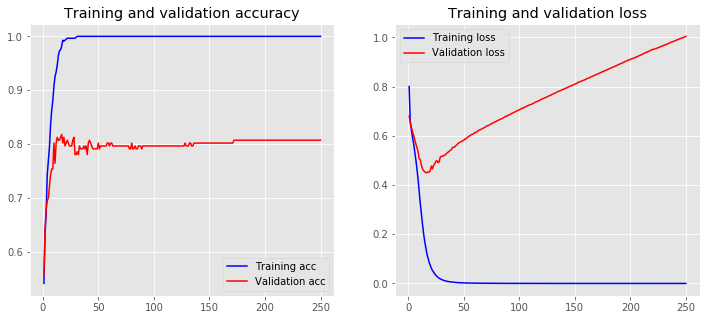

In [24]:
'''
Since the word embeddings are not additionally trained, it is expected to be lower. 
But let’s now see how this performs if we allow the embedding to be 
trained by using trainable=True:
'''

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=250,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          257500    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 322,929
Trainable params: 322,929
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 1.0000
Testing Accuracy:  0.7594


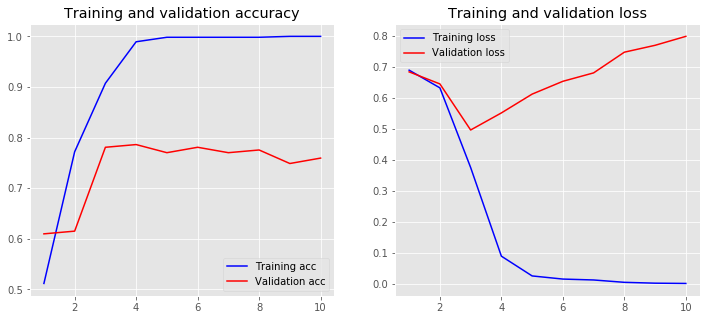

In [26]:
# CNN
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

plot_history(history)

In [27]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [28]:
param_grid = dict(num_filters=[32, 64],
                  kernel_size=[5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'sentiment-labelled-sentences/output.txt'

# Run grid search for each source (yelp, amazon, imdb)
for source, frame in df.groupby('source'):
    print('Running grid search for data set :', source)
    sentences = df['sentence'].values
    y = df['label'].values

    # Train-test split
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    # Tokenize words
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
    vocab_size = len(tokenizer.word_index) + 1

    # Pad sequences with zeros
    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

    # Parameter grid for grid search
    param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
    
    model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)
    
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
    
    grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
    test_accuracy = grid.score(X_test, y_test)

    # Save and evaluate results
    prompt = input(f'finished {source}; write to file and proceed? [y/n]')
    if prompt.lower() not in {'y', 'true', 'yes'}:
        break
    with open(output_file, 'a') as f:
        s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
        output_string = s.format(
            source,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
        print(output_string)
        f.write(output_string)

Running grid search for data set : amazon
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 15.8min finished


finished amazon; write to file and proceed? [y/n]y
Running amazon data set
Best Accuracy : 0.8205
{'vocab_size': 4603, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy : 0.8472


Running grid search for data set : imdb
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
